# Nested Summarization With Heading Hierarchy: Syntax Analysis
### AI 829: NLP Mandate 3 Contribution
By: Rachna S Kedigehalli (IMT2019069)
    Nandakishore S Menon (IMT2019057)

### Abstract
In this mandate contribution, we have performed POS tagging, RegexParsing and dependency parsing using StanfordParser on the input data for syntax analysis. We have alse performed Coreference resolution using Neural Coref and Ambiguity Resolution using ExpertAI NLP API.

In [1]:
from os import listdir
from string import punctuation
punctuation+='\n'
import re
from bs4 import BeautifulSoup
import pandas as pd
import math
from tqdm import tqdm

# Loading Data

In [2]:
def load_doc(filename):
    file = open(filename, encoding='utf-8')
    text = file.read()
    file.close()
    return text

In [3]:
def split_story(doc):
    index = doc.find('@highlight')
    story, highlights = doc[:index], doc[index:].split('@highlight')
    highlights = [h.strip() for h in highlights if len(h) > 0]
    return story, highlights

In [4]:
def load_stories(directory):
    all_stories = list()
    for name in tqdm(listdir(directory)):
        filename = directory + '/' + name
        doc = load_doc(filename)
        story, highlights = split_story(doc)
        all_stories.append({'story':story, 'highlights':highlights})
    return all_stories

In [5]:
directory = '../input/cnn-dailymail/cnn/stories'
data = load_stories(directory)
print('Loaded Stories %d' % len(data))

100%|██████████| 92579/92579 [07:28<00:00, 206.59it/s]

Loaded Stories 92579


In [6]:
stories = [story['story'] for story in data]

In [7]:
len(stories)

92579

In [8]:
data_df = [[d['story'], d['highlights']] for d in data]
df = pd.DataFrame(data_df).rename(columns={0:"text", 1:"summary"})
df.head()

,text,summary
0,Washington (CNN) -- After years of planning an...,[Romney and running mate Paul Ryan to campaign...
1,In its effort to curb game addiction among ado...,"[The ""Cinderella law"" blocks under-16 gamers f..."
2,"(CNN)On the surface, the mix-up seems incompre...",[Attorney: Robert Bates assumed the gun was a ...
3,"(CNN) -- Since appearing on season 13 of ""Danc...",[Chaz Bono says a change in eating habits help...
4,(CNN) -- The late Chris Benoit idolized the Dy...,[Vince McMahon: WWE has one of best drug-testi...


In [9]:
df['text'] = df['text'].apply(lambda x: x.replace('\n',''))
df['text'] = df['text'].apply(lambda x: x.replace("\"", ""))
df['summary'] = df['summary'].apply(lambda x: ". ".join(x))
df.head()

,text,summary
0,Washington (CNN) -- After years of planning an...,Romney and running mate Paul Ryan to campaign ...
1,In its effort to curb game addiction among ado...,"The ""Cinderella law"" blocks under-16 gamers fr..."
2,"(CNN)On the surface, the mix-up seems incompre...",Attorney: Robert Bates assumed the gun was a T...
3,(CNN) -- Since appearing on season 13 of Danci...,Chaz Bono says a change in eating habits helpe...
4,(CNN) -- The late Chris Benoit idolized the Dy...,Vince McMahon: WWE has one of best drug-testin...


# Preprocessing

## Expanding Contractions
Eg: he's -> he is

In [10]:
!pip install contractions
import contractions

In [11]:
def expand_contractions(sentence):
    contractions_expanded = [contractions.fix(word) for word in sentence.split()]
    return ' '.join(contractions_expanded) 

In [12]:
df['text'] = df['text'].apply(lambda x: expand_contractions(x))
df['summary'] = df['summary'].apply(lambda x: expand_contractions(x))

## Syntax Analysis

In [13]:
text = df['summary'][4124]
text

'John Crawford III, who was shopping, was shot by a white police officer in Walmart. Van Jones: There is video evidence and Walmart should release the tape to the public. He says racism is not a thing of the past; implicit bias lurks in our minds. Jones: Walmart has an obligation to make sure that black people feel safe in its stores'

In [14]:
text2 = "The film was shot more than a decade back."

### POS tagging

In [15]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag, word_tokenize
!pip install graphviz

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [16]:
tagged = pos_tag(word_tokenize(text))
tagged

[('John', 'NNP'),
 ('Crawford', 'NNP'),
 ('III', 'NNP'),
 (',', ','),
 ('who', 'WP'),
 ('was', 'VBD'),
 ('shopping', 'VBG'),
 (',', ','),
 ('was', 'VBD'),
 ('shot', 'VBN'),
 ('by', 'IN'),
 ('a', 'DT'),
 ('white', 'JJ'),
 ('police', 'NN'),
 ('officer', 'NN'),
 ('in', 'IN'),
 ('Walmart', 'NNP'),
 ('.', '.'),
 ('Van', 'NNP'),
 ('Jones', 'NNP'),
 (':', ':'),
 ('There', 'EX'),
 ('is', 'VBZ'),
 ('video', 'JJ'),
 ('evidence', 'NN'),
 ('and', 'CC'),
 ('Walmart', 'NNP'),
 ('should', 'MD'),
 ('release', 'VB'),
 ('the', 'DT'),
 ('tape', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('public', 'NN'),
 ('.', '.'),
 ('He', 'PRP'),
 ('says', 'VBZ'),
 ('racism', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('a', 'DT'),
 ('thing', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('past', 'NN'),
 (';', ':'),
 ('implicit', 'JJ'),
 ('bias', 'NN'),
 ('lurks', 'NNS'),
 ('in', 'IN'),
 ('our', 'PRP$'),
 ('minds', 'NNS'),
 ('.', '.'),
 ('Jones', 'NNP'),
 (':', ':'),
 ('Walmart', 'NNP'),
 ('has', 'VBZ'),
 ('an', 'DT'),
 ('obligation

### Dependency parsing using Stanford Parser

In [17]:
from nltk.parse.stanford import StanfordDependencyParser

In [18]:
from graphviz import Source

In [19]:
path_jar = '../input/stanfordparser/stanford-parser-full-2020-11-17/stanford-parser.jar'
path_models_jar = '../input/stanfordparser/stanford-parser-full-2020-11-17/stanford-parser-4.2.0-models.jar'
dep_parser = StanfordDependencyParser(
   path_to_jar = path_jar, path_to_models_jar = path_models_jar
)
result = dep_parser.raw_parse(text)
dependency = result.__next__()
list(dependency.triples())
# sample_text = "The quick brown fox jumps over the lazy dog"

[(('shot', 'VBN'), 'nsubj:pass', ('III', 'NNP')),
 (('III', 'NNP'), 'compound', ('John', 'NNP')),
 (('III', 'NNP'), 'compound', ('Crawford', 'NNP')),
 (('III', 'NNP'), 'acl:relcl', ('shopping', 'VBG')),
 (('shopping', 'VBG'), 'nsubj', ('who', 'WP')),
 (('shopping', 'VBG'), 'aux', ('was', 'VBD')),
 (('shot', 'VBN'), 'aux:pass', ('was', 'VBD')),
 (('shot', 'VBN'), 'obl', ('officer', 'NN')),
 (('officer', 'NN'), 'case', ('by', 'IN')),
 (('officer', 'NN'), 'det', ('a', 'DT')),
 (('officer', 'NN'), 'amod', ('white', 'JJ')),
 (('officer', 'NN'), 'compound', ('police', 'NN')),
 (('officer', 'NN'), 'nmod', ('Jones', 'NNP')),
 (('Jones', 'NNP'), 'case', ('in', 'IN')),
 (('Jones', 'NNP'), 'compound', ('Walmart', 'NNP')),
 (('Jones', 'NNP'), 'compound', ('Van', 'NNP')),
 (('Jones', 'NNP'), 'parataxis', ('is', 'VBZ')),
 (('is', 'VBZ'), 'expl', ('There', 'EX')),
 (('is', 'VBZ'), 'nsubj', ('evidence', 'NN')),
 (('evidence', 'NN'), 'compound', ('video', 'NN')),
 (('is', 'VBZ'), 'conj', ('release', 'V

In [20]:
dot_file = dependency.to_dot()

In [21]:
s = Source(dot_file, filename="test", format="png")

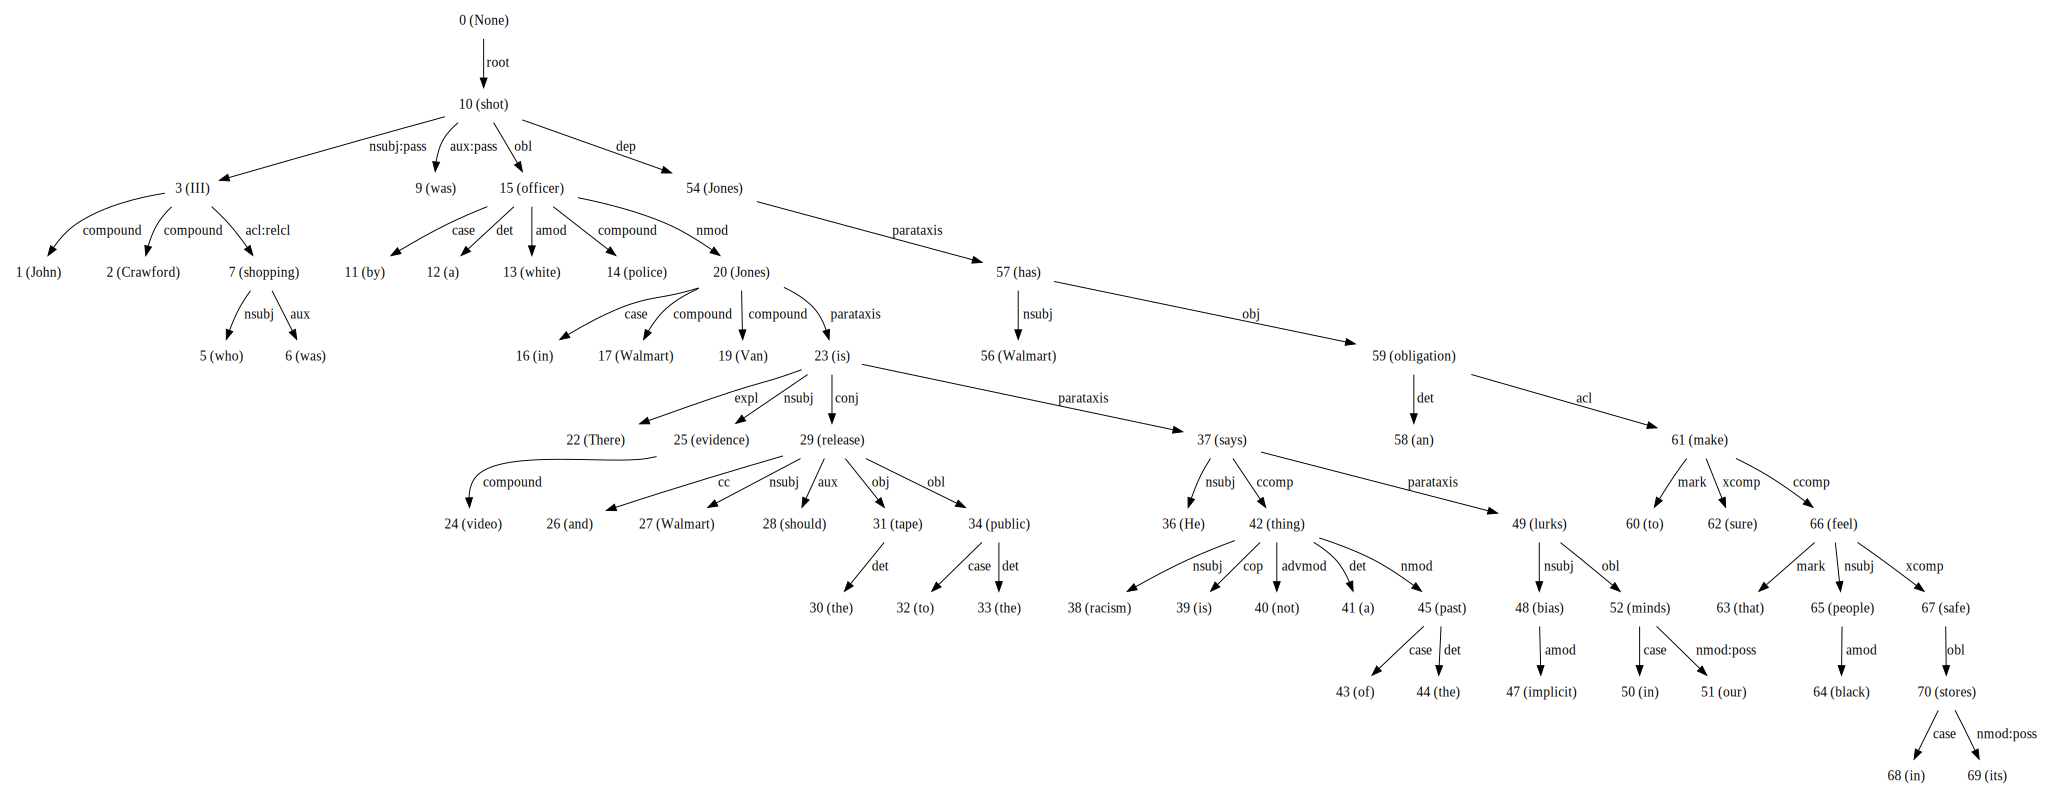

In [22]:
display(s)

### Coreference Resolution

In [23]:
!pip uninstall -y spacy 
!pip uninstall -y neuralcoref
!pip cache purge
!pip install spacy==2.1.0
!pip install neuralcoref --no-binary neuralcoref

Found existing installation: spacy 2.1.0
Uninstalling spacy-2.1.0:
  Successfully uninstalled spacy-2.1.0
Found existing installation: neuralcoref 4.0
Uninstalling neuralcoref-4.0:
  Successfully uninstalled neuralcoref-4.0
Files removed: 12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 14.3 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.2.0 requires spacy<3.3.0,>=3.2.0, but you have spacy 2.1.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.7/368.7 KB 1.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
Skipping wheel build for neuralcoref, due to binaries being disabled for it.
  Running setup.py install for neuralcoref ... done


In [24]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.9/826.9 MB 19.9 MB/s eta 0:00:0000:0100:02
  Preparing metadata (setup.py) ... done
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [25]:
import spacy
import neuralcoref
import en_core_web_lg

In [26]:
nlp = en_core_web_lg.load()
neuralcoref.add_to_pipe(nlp)

In [27]:
def coref_clusters(sentence):
    doc = nlp(sentence)
    for ent in doc.ents:
        if ent._.coref_cluster is not None:
            print(ent._.coref_cluster)

In [28]:
coref_clusters(text)

Walmart: [Walmart, Walmart, Walmart, its]
Van Jones: [Van Jones, He, Jones]
Walmart: [Walmart, Walmart, Walmart, its]
Van Jones: [Van Jones, He, Jones]
Walmart: [Walmart, Walmart, Walmart, its]


### Ambiguity Resolution

In [29]:
!pip install expertai-nlapi

### API keys set as env variables (***removed***)

In [30]:
!export EAI_USERNAME=vihol67828@dmosoft.com

In [31]:
!export EAI_PASSWORD=Abcd@1234

In [32]:
import os
os.environ["EAI_USERNAME"] = 'vihol67828@dmosoft.com'
os.environ["EAI_PASSWORD"] = 'Abcd@1234'

In [33]:
from expertai.nlapi.cloud.client import ExpertAiClient
client = ExpertAiClient()

In [34]:
key1 = "The key broke in the lock."
key2 = "The key problem was not one of quality but of quantity."

In [35]:
def semantic_tagging(sentence):
    document = client.specific_resource_analysis(
    body={"document": {"text": sentence}}, 
    params={'language': 'en', 'resource': 'disambiguation'})
    print(f'Semantic tagging for "{sentence}"\n')
    for token in document.tokens:
        print(f'{document.content[token.start:token.end]:{15}}\tCONCEPT_ID: {token.syncon}')
    return document

In [36]:
semantic_tagging(text)

Semantic tagging for "John Crawford III, who was shopping, was shot by a white police officer in Walmart. Van Jones: There is video evidence and Walmart should release the tape to the public. He says racism is not a thing of the past; implicit bias lurks in our minds. Jones: Walmart has an obligation to make sure that black people feel safe in its stores"

John Crawford III	CONCEPT_ID: -1
,              	CONCEPT_ID: -1
who            	CONCEPT_ID: -1
was            	CONCEPT_ID: -1
shopping       	CONCEPT_ID: 66129
,              	CONCEPT_ID: -1
was            	CONCEPT_ID: -1
shot           	CONCEPT_ID: 66999
by             	CONCEPT_ID: -1
a              	CONCEPT_ID: -1
white          	CONCEPT_ID: 76710
police officer 	CONCEPT_ID: 44234
in             	CONCEPT_ID: -1
Walmart        	CONCEPT_ID: 217949
.              	CONCEPT_ID: -1
Van            	CONCEPT_ID: 150886
Jones          	CONCEPT_ID: 105660
:              	CONCEPT_ID: -1
There          	CONCEPT_ID: -1
is             	CONCEPT_ID

In [37]:
semantic_tagging(text2)

Semantic tagging for "The film was shot more than a decade back."

The            	CONCEPT_ID: -1
film           	CONCEPT_ID: 29079
was            	CONCEPT_ID: -1
shot           	CONCEPT_ID: 66463
more           	CONCEPT_ID: -1
than           	CONCEPT_ID: 205127
a              	CONCEPT_ID: -1
decade         	CONCEPT_ID: 62433
back           	CONCEPT_ID: 157644
.              	CONCEPT_ID: -1


Since the CONCEPT_ID of the word 'shot' is different in both the sentences, it can be inferred that the first sentence has a different meaning of 'shot' when compared to the second sentence.

### Dependency parsing

In [38]:
import spacy
from spacy import displacy

In [39]:
nlp = en_core_web_lg.load()

In [40]:
print(f"{'Token':{8}} {'dependence':{6}} {'head text':{9}}  {'Dependency explained'} ")
for token in nlp(text):
     print(f"{token.text:{8}} {token.dep_+' =>':{10}}   {token.head.text:{9}}  {spacy.explain(token.dep_)} ")

Token    dependence head text  Dependency explained 
John     compound =>   III        None 
Crawford compound =>   III        None 
III      nsubjpass =>   shot       nominal subject (passive) 
,        punct =>     III        punctuation 
who      nsubj =>     shopping   nominal subject 
was      aux =>       shopping   auxiliary 
shopping relcl =>     III        None 
,        punct =>     III        punctuation 
was      auxpass =>   shot       auxiliary (passive) 
shot     ROOT =>      shot       None 
by       agent =>     shot       agent 
a        det =>       officer    determiner 
white    amod =>      officer    adjectival modifier 
police   compound =>   officer    None 
officer  pobj =>      by         object of preposition 
in       prep =>      officer    prepositional modifier 
Walmart  pobj =>      in         object of preposition 
.        punct =>     shot       punctuation 
Van      compound =>   Jones      None 
Jones    ROOT =>      Jones      None 
:        punct

In [41]:
doc = nlp(text)
displacy.render(doc,jupyter=True)

## References

* https://ryanong.co.uk/2020/07/14/day-196-coreference-resolution-with-neuralcoref-spacy/
* https://towardsdatascience.com/visualizing-what-docs-are-really-about-with-expert-ai-cd537e7a2798